In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ls

Dataset.zip  drive/  sample_data/  TRAIN_SET.zip


In [11]:
cd//content/drive/My Drive/Colab Notebooks/TRAIN_SET

/content/drive/My Drive/Colab Notebooks/TRAIN_SET


In [12]:
ls

APPLES/  BANANA/  Dataset.zip  ORANGE/  PINEAPPLE/  WATERMELON/


IMPORTING NECESSARY LIBRARIES

In [13]:
import numpy as np#used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consists of a tensor-in tensor-out computation function
#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import Dense,Flatten
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout #Convolutional layer
#MaxPooling2D-for downsampling the image
from keras.preprocessing.image import ImageDataGenerator

IMAGE DATA AUGUMENTATION

In [14]:
#setting parameter for Image Data agumentation to the training data
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#Image Data agumentation to the testing data
test_datagen=ImageDataGenerator(rescale=1./255)

LOADING OUR DATA AND PERFORMING DATA AUGUMENTATION

In [17]:
#performing data agumentation to train data
x_train = train_datagen.flow_from_directory(
    r'/content/drive/My Drive/Colab Notebooks/TRAIN_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')
#performing data agumentation to test data
x_test = test_datagen.flow_from_directory(
    r'/content/drive/My Drive/Colab Notebooks/TRAIN_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse') 

Found 2626 images belonging to 5 classes.
Found 2626 images belonging to 5 classes.


In [18]:
print(x_train.class_indices)#checking the number of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [19]:
print(x_test.class_indices)#checking the number of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [20]:
from collections import Counter as c
c(x_train .labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

CREATING THE MODEL

In [21]:
# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax')) # softmax for more than 2

In [22]:
classifier.summary()#summary of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

COMPILING THE MODEL

In [23]:
# Compiling the CNN
# categorical_crossentropy for more than 2
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

FITTING THE MODEL

In [24]:
classifier.fit_generator(
        generator=x_train,steps_per_epoch = len(x_train),
        epochs=10, validation_data=x_test,validation_steps = len(x_test))# No of images in test set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
526/526 [==============================] - 754s 1s/step - loss: 0.1471 - accuracy: 0.9444 - val_loss: 6.0539e-04 - val_accuracy: 1.0000
Epoch 2/10
526/526 [==============================] - 39s 74ms/step - loss: 5.2392e-04 - accuracy: 1.0000 - val_loss: 5.8374e-05 - val_accuracy: 1.0000
Epoch 3/10
526/526 [==============================] - 37s 71ms/step - loss: 0.0154 - accuracy: 0.9970 - val_loss: 8.8329e-04 - val_accuracy: 1.0000
Epoch 4/10
526/526 [==============================] - 36s 68ms/step - loss: 0.0214 - accuracy: 0.9935 - val_loss: 3.9568e-05 - val_accuracy: 1.0000
Epoch 5/10
526/526 [==============================] - 37s 71ms/step - loss: 1.0810e-04 - accuracy: 1.0000 - val_loss: 2.3111e-05 - val_accuracy: 1.0000
Epoch 6/10
526/526 [==============================] - 37s 71ms/step - loss: 3.8349e-05 - accuracy: 1.0000 - val_loss: 7.5487e-06 - val_accuracy: 1.0000
Epoch 7/10
526/526 [==============================] - 38s 72ms/step - loss: 1.6732e-05 - accuracy: 1.

SAVING THE MODEL

In [25]:
# Save the model
classifier.save('nutrition.h5')

Nutrition Image Analysis using CNN


Predicting our results

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

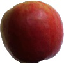

In [31]:
img = image.load_img("/content/drive/My Drive/Colab Notebooks/TRAIN_SET/APPLES/3_100.jpg",target_size= (64,64))#loading of the image
img

In [32]:
x=image.img_to_array(img)#conversion image into array

In [34]:
x

array([[[254., 255., 253.],
        [255., 255., 253.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 253.],
        [255., 255., 253.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [35]:
x.ndim

3

In [36]:
x=np.expand_dims(x,axis=0) #expand the dimension

In [37]:
x.ndim

4

In [38]:
pred = classifier.predict(x)

1/1 [==============================] - 0s 117ms/step


In [39]:
pred

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [40]:
labels=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'APPLES'